# Anomaly Detection

In [1]:
import numpy as np
import numexpr as ne
import scipy.io
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Gaussian distribution

In [2]:
def get_mean_and_variance(X):
    mean = np.mean(X, axis=0)
    variance = np.var(X, axis=0)
    return mean, variance

In [3]:
def gaussian_distribution(X, mean, variance):
    scalar = 1 / np.sqrt(2 * np.pi * variance)
    exp = - (((X - mean) ** 2) / (2 * variance))
    p_each_feature = scalar * np.power(np.e, exp)
    return np.prod(p_each_feature, axis=1)

In [4]:
ex8data1 = scipy.io.loadmat('data/ex8data1.mat')
X = ex8data1['X']

In [5]:
mean, variance = get_mean_and_variance(X)

In [6]:
x_plot = np.arange(0, 25, 0.1)
y_plot = np.arange(0, 25, 0.1)
new_features_x = np.repeat(x_plot, np.size(y_plot))
new_features_x = new_features_x.reshape(np.size(new_features_x), 1)
new_features_y = np.tile(y_plot, np.size(x_plot))
new_features_y = new_features_y.reshape(np.size(new_features_y), 1)
new_features = np.append(new_features_x, new_features_y, axis=1)

In [7]:
res = gaussian_distribution(new_features, mean, variance)
res = res.reshape(np.size(x_plot), np.size(y_plot))

In [56]:
xx = []
yy = []
for i in range(np.size(res, axis=0)):
    for j in range(np.size(res, axis=1)):
        val = res[i, j]
        if val < 0.0008 and val > 0.0006:
            xx.append(x_plot[i])
            yy.append(y_plot[j])

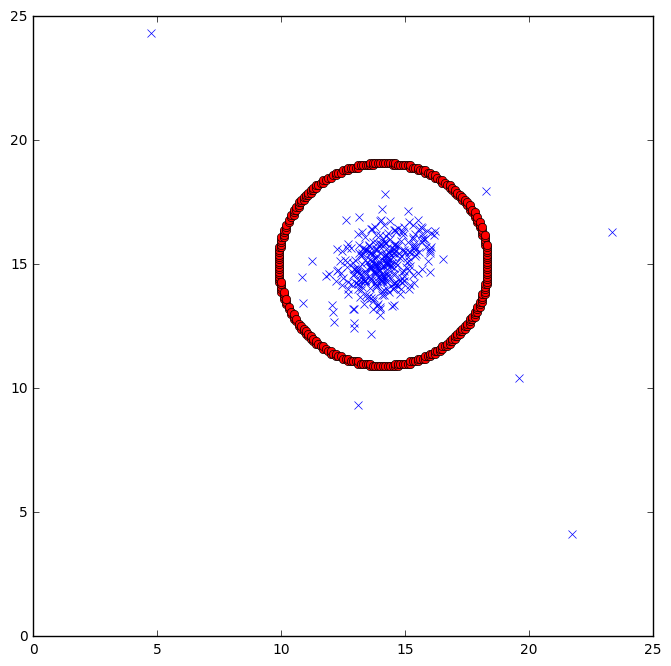

In [57]:
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, 'ro')
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.show()